2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
La matrice est définie positive
La matrice est symétrique
La matrice admet une décomposition de cholesky
[[ 1.41421356  0.          0.         ...  0.          0.
   0.        ]
 [-0.70710678  1.22474487  0.         ...  0.          0.
   0.        ]
 [ 0.         -0.81649658  1.15470054 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  1.00508909  0.
   0.        ]
 [ 0.          0.          0.         ... -0.99493668  1.00503782
   0.        ]
 [ 0.          0.          0.         ...  0.         -0.99498744
   1.00498756]]


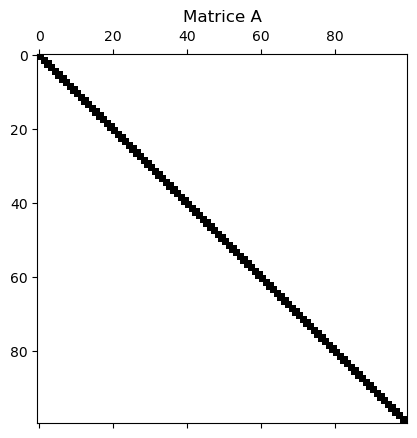

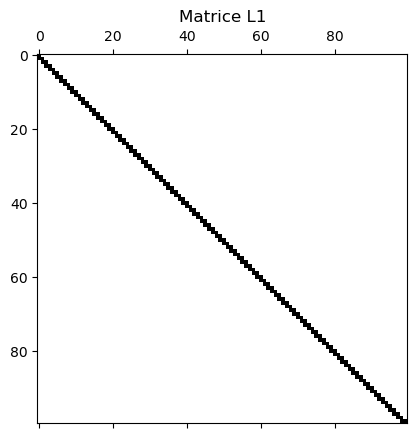

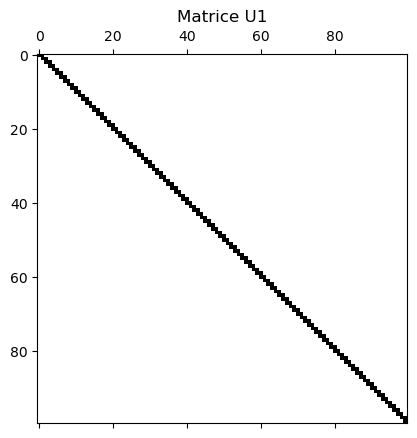

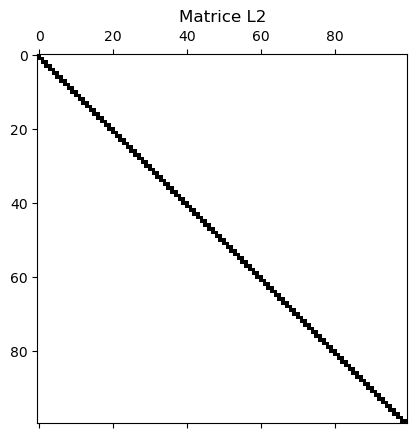

298
199
199
199
[ 0.69770395 -0.0188192  -0.02825225 -0.0377028  -0.04717123 -0.05665774
 -0.06616241 -0.07568531 -0.08522642 -0.09478571 -0.10436314 -0.11395862
 -0.12357206 -0.13320334 -0.14285234 -0.15251891 -0.16220288 -0.1719041
 -0.18162237 -0.19135749 -0.20110927 -0.21087747 -0.22066186 -0.2304622
 -0.24027825 -0.25010972 -0.25995636 -0.26981787 -0.27969397 -0.28958435
 -0.2994887  -0.30940671 -0.31933805 -0.32928238 -0.33923937 -0.34920865
 -0.35918989 -0.36918272 -0.37918676 -0.38920165 -0.399227   -0.40926244
 -0.41930756 -0.42936199 -0.43942533 -0.44949716 -0.45957709 -0.46966471
 -0.47975962 -0.48986139 -0.49996961 -0.51008387 -0.52020375 -0.53032884
 -0.54045871 -0.55059295 -0.56073114 -0.57087286 -0.58101769 -0.59116523
 -0.60131505 -0.61146674 -0.6216199  -0.63177412 -0.64192899 -0.65208412
 -0.6622391  -0.67239356 -0.68254709 -0.69269931 -0.70284985 -0.71299833
 -0.72314439 -0.73328766 -0.74342779 -0.75356443 -0.76369723 -0.77382587
 -0.78395001 -0.79406934 -0.80418353 

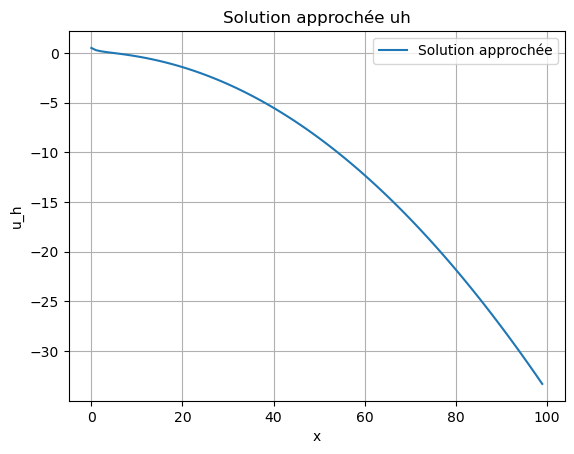

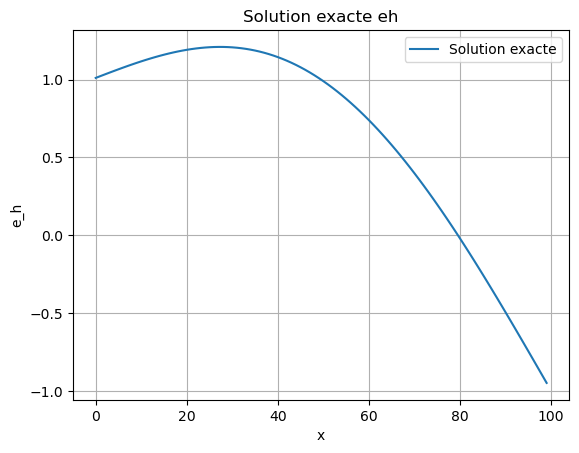

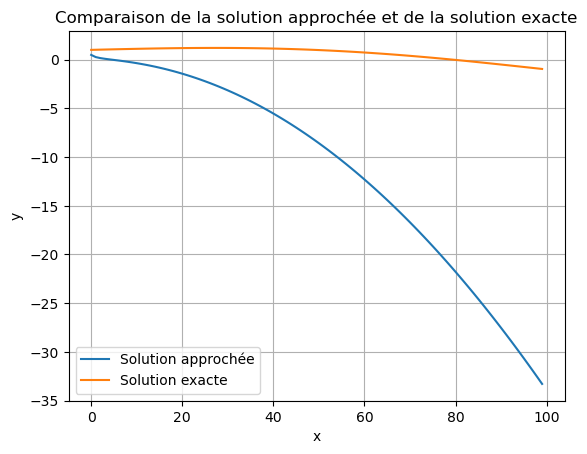

In [75]:
#02 - b
import numpy as np
import math
import scipy.linalg
import matplotlib.pyplot as plt

def get_laplacien(N):
    
    A = 2 * np.eye(N) - np.eye(N, k=1) - np.eye(N, k=-1)

    return A


#02 - c
def get_rhs (N, T0, T1):
    h = 1 / (N+1)
    x = h*np.arange (1,N+1)
    Fh = np.pi*np.sin(np.pi*x)
    T = np.zeros (N)
    T[0] = T0
    T[-1] = T1
    b = h**2 * Fh + T
    return b


#03 - a
N = 100
A = get_laplacien(N) 

for p in range(1, N + 1):
    Ap = A[0:p,0:p]
    # Calculer les mineurs principaux mp
    mp = np.linalg.det(Ap)
    m = math.ceil(mp)  #pour arrondir les valeurs
    print(m)
#on remarque les mineurs principaux ne changent pas de signe donc p est l'identité, pas de permutations effectués.

#03 - b

P, L1, U1 = scipy.linalg.lu(A)

#03 - c
#La matrice A admet une décomposition de cholesky car la matrice A est symetrique définie positive
def est_definie_positive(ma):
    try:
        np.linalg.cholesky(ma)
        return True
    except np.linalg.LinAlgError:
        return False
    
if est_definie_positive(A):
    print("La matrice est définie positive")
else:
    print("La matrice n'est pas définie positive")
    
def est_symetrique(mat):
    return np.allclose(mat, mat.T)

if est_symetrique(A):
    print("La matrice est symétrique")
else:
    print("La matrice n'est pas symétrique")
if est_symetrique(A) and est_definie_positive(A):
    print("La matrice admet une décomposition de cholesky")
    
L2 = np.linalg.cholesky(A)
print(L2)

#03 - d
plt.spy(A)
plt.title("Matrice A")
plt.show()

plt.spy(L1)
plt.title("Matrice L1")
plt.show()

plt.spy(U1)
plt.title("Matrice U1")
plt.show()

plt.spy(L2)
plt.title("Matrice L2")
plt.show()


print(np.count_nonzero(A))
print(np.count_nonzero(L1))
print(np.count_nonzero(U1))
print(np.count_nonzero(L2))
#d'apres les graphes je remarque que L1, U1, L2 sont les mêmes.
#d'aprés la fonction np.count_nonzero, l1, U1, et L2 ont la même valeur(les mêmes nombres d'éléments non nuls).


#04 - a

bh = get_rhs (100, 1, -1)
y = np.linalg.solve(L2.T,bh)
print(y)

Uh = np.linalg.solve(L2,y)
print(Uh)

#Tracer la solution approchée
plt.plot(Uh, label="Solution approchée")
plt.xlabel("x")
plt.ylabel("u_h")
plt.title("Solution approchée uh")
plt.legend()
plt.grid(True)
plt.show()

#Tracer la solution exacte
def sol_exacte (N, T0, T1):
    h = 1 / (N+1)
    x = h*np.arange (1,N+1)
    Ue = np.sin(np.pi*x) + T0 + (T1-T0)*x
    return Ue

Se = sol_exacte (100, 1, -1)

plt.plot(Se, label="Solution exacte")
plt.xlabel("x")
plt.ylabel("e_h")
plt.title("Solution exacte eh")
plt.legend()
plt.grid(True)
plt.show()

# Tracer les deux solutions sur le même graphique
plt.plot(Uh, label="Solution approchée")
plt.plot(Se, label="Solution exacte")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparaison de la solution approchée et de la solution exacte")
plt.legend()
plt.grid(True)
plt.show()

#on remarque que quand x est grand les sol s'éloigne
#la solution approchée est toujours inférieure ou toujours supérieure à la solution exacte sur tout le domaine, cela indique un biais systématique dans la méthode.

In [39]:
import numpy as np

A = np.array([[4, 12, -16],
              [12, 37, -43],
              [-16, -43, 98]])

# Calcul de la décomposition de Cholesky
C = np.linalg.cholesky(A)

print("Matrice de Cholesky C:")
print(C)
print(C.T)

Matrice de Cholesky C:
[[ 2.  0.  0.]
 [ 6.  1.  0.]
 [-8.  5.  3.]]
[[ 2.  6. -8.]
 [ 0.  1.  5.]
 [ 0.  0.  3.]]


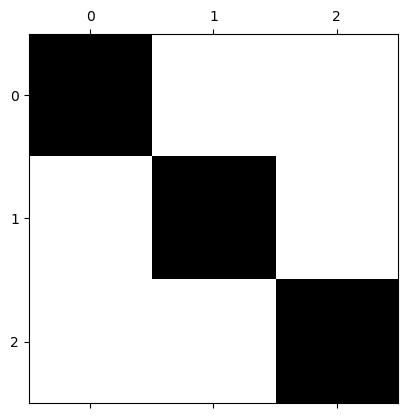

(array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]]), array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]]), array([[1., 0., 0.],
       [0., 2., 0.],
       [0., 0., 3.]]))
(array([0, 1, 2]), array([0, 1, 2]))


In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Création d'une matrice avec des éléments non nuls
A = np.array([[1, 0, 0],
              [0, 2, 0],
              [0, 0, 3]])

# Visualisation de la répartition des éléments non nuls
plt.spy(A)
plt.show()
L1U1 = scipy.linalg.lu(A)
print(L1U1)
indices = np.nonzero(A)
print(indices)
#renvoie les positions des elements dans une matrice (0,0), (1,1), (2,2)